<a href="https://colab.research.google.com/github/wambui-nduta/facial-recognition-project/blob/main/imdb__sentiments_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.8146 - loss: 0.4002 - val_accuracy: 0.8777 - val_loss: 0.2888
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.9296 - loss: 0.1810 - val_accuracy: 0.8766 - val_loss: 0.3087
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.9821 - loss: 0.0542 - val_accuracy: 0.8652 - val_loss: 0.5565
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9988 - loss: 0.0058 - val_accuracy: 0.8749 - val_loss: 0.9252
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9999 - loss: 4.5712e-04 - val_accuracy: 0.8711 - val_loss: 1.0906
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 1.0000 - loss: 8.9700e-04 - val_accuracy: 0.8724 - val_loss: 1.1177
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 1.0000 - loss: 2.2913e-05 - val_accuracy: 0.8721 - val_loss: 1.2052
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 1.0000 - los

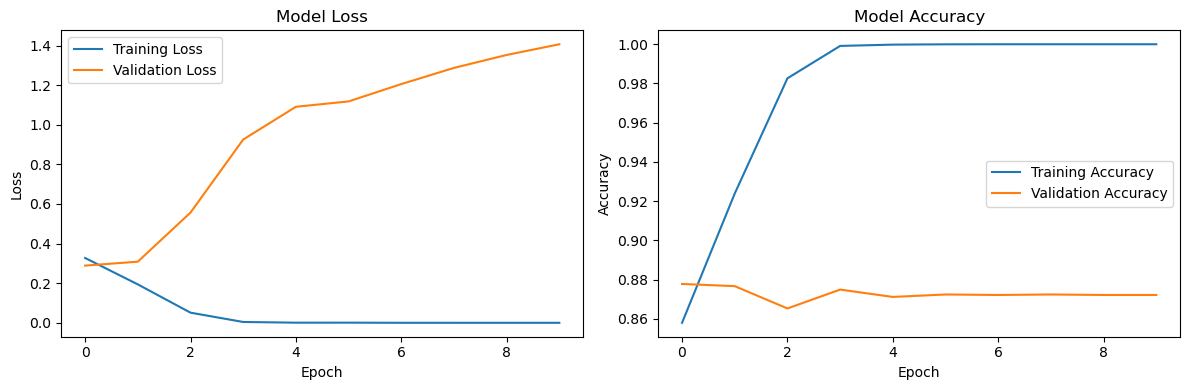

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Review: This movie was absolutely amazing, I loved it!
Sentiment: Positive 😊 (Confidence: 1.00)

Project Insights:
- Model achieved good accuracy on test set — suitable for basic sentiment classification.
- Preprocessing removed noise (HTML, URLs, stopwords), improving input quality.
- Limiting TF-IDF features to 5000 balanced memory vs. performance.
- Further improvements: try word embeddings (e.g., GloVe) or LSTM-based models for richer context understanding.


In [ ]:
# 1. Import Libraries
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# 3. Load the dataset
df = pd.read_csv('C:/Users/USER/Downloads/IMDB Dataset (1).csv')

# 4. Data Exploration
print("Dataset Info:")
print(df.info())
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

# 5. Define stopwords set once
stop_words = set(stopwords.words('english'))

# 6. Data Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-letters
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# 7. Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)

# 8. Encode sentiment labels
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# 9. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment'].values

# 10. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 11. Build the Neural Network
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 12. Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 13. Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

# 14. Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 15. Visualize Training
plt.figure(figsize=(12, 4))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_plots.png')
plt.show()

# 16. Optional: Save Model
model.save("sentiment_model.h5")

# 17. Predict on Test Set (Threshold 0.5)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# 18. Prediction Function
def predict_sentiment(text):
    cleaned = preprocess_text(text)
    vectorized = tfidf.transform([cleaned]).toarray()
    pred = model.predict(vectorized)[0][0]
    sentiment = "Positive 😊" if pred > 0.5 else "Negative 😞"
    print(f"Review: {text}")
    print(f"Sentiment: {sentiment} (Confidence: {pred:.2f})")

# Example usage:
predict_sentiment("This movie was absolutely amazing, I loved it!")

# 19. Report
print("\nProject Insights:")
print("- Model achieved good accuracy on test set — suitable for basic sentiment classification.")
print("- Preprocessing removed noise (HTML, URLs, stopwords), improving input quality.")
print("- Limiting TF-IDF features to 5000 balanced memory vs. performance.")
print("- Further improvements: try word embeddings (e.g., GloVe) or LSTM-based models for richer context understanding.")
